import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files
sns.set_style('whitegrid')

upload data

In [ ]:
uploaded = files.upload()
traindata = pd.read_csv(io.BytesIO(uploaded['drug200_v2.csv']))

Saving drug200_v2.csv to drug200_v2.csv


In [ ]:
traindata.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
traindata.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
traindata.isnull().sum()

Age            0
Sex            0
BP             3
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

To remove the NA value, I decided to use pad and get the value from previous data

In [ ]:
traindata.fillna(method="bfill")

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
traindata.isnull().sum()

Age            0
Sex            0
BP             3
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

finding Z score

In [ ]:
traindata['Z-score'] = (traindata['Na_to_K']-traindata['Na_to_K'].mean())/traindata['Na_to_K'].std()
traindata.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Z-score
0,23,F,HIGH,HIGH,25.355,DrugY,1.283302
1,47,M,LOW,HIGH,13.093,drugC,-0.414106
2,47,M,LOW,HIGH,10.114,drugC,-0.826484
3,28,F,NORMAL,HIGH,7.798,drugX,-1.147084
4,61,F,LOW,HIGH,18.043,DrugY,0.271114


In [ ]:
print("Mean: ", traindata['Z-score'].mean())
print("Std: ", traindata['Z-score'].std())

Mean:  -8.43769498715119e-17
Std:  1.0


Creating 4 bins

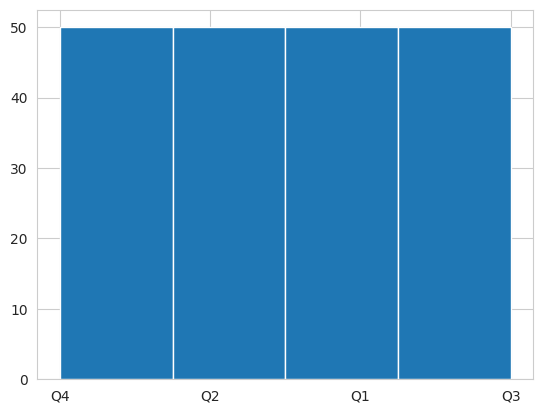

In [ ]:
QLabels =['Q1','Q2','Q3','Q4']
traindata['binQcut'] = pd.qcut(traindata['Na_to_K'], q=4, precision=1, labels= QLabels)
plt.hist(traindata['binQcut'], bins=4)
plt.show()

One hot encoding

In [ ]:
temp = pd.get_dummies(traindata['Cholesterol'])
traindata = pd.concat([traindata, temp], axis=1)

In [ ]:
traindata.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Z-score,binQcut,HIGH,NORMAL
0,23,F,HIGH,HIGH,25.355,DrugY,1.283302,Q4,1,0
1,47,M,LOW,HIGH,13.093,drugC,-0.414106,Q2,1,0
2,47,M,LOW,HIGH,10.114,drugC,-0.826484,Q1,1,0
3,28,F,NORMAL,HIGH,7.798,drugX,-1.147084,Q1,1,0
4,61,F,LOW,HIGH,18.043,DrugY,0.271114,Q3,1,0


New attribute is Risk of heart attack. If
BP and cholesterol high, risk = HIGH.
One is high other is normal, risk = HIGH.
Both normal, risk = MEDIUM
One normal one low, risk = LOW
One high one low , risk = MEDIUM

In [ ]:
def find_risk(data):
  risk_temp = []
  for row in range(data.shape[0]):
    if(data["Cholesterol"].at[row] == 'HIGH' and data["BP"].at[row] == 'HIGH'):
      risk = 'HIGH'
    elif(data["Cholesterol"].at[row] == 'HIGH' and data["BP"].at[row] == 'NORMAL'):
      risk = 'HIGH'
    elif(data["Cholesterol"].at[row] == 'HIGH' and data["BP"].at[row] == 'LOW'):
      risk = 'MEDIUM'
    elif(data["Cholesterol"].at[row] == 'NORMAL' and data["BP"].at[row] == 'HIGH'):
      risk = 'HIGH'
    elif(data["Cholesterol"].at[row] == 'NORMAL' and data["BP"].at[row] == 'NORMAL'):
      risk = 'MEDIUM'
    elif(data["Cholesterol"].at[row] == 'NORMAL' and data["BP"].at[row] == 'LOW'):
      risk = 'LOW'
    risk_temp.append(risk)
  data["Risk"]= risk_temp

In [ ]:
find_risk(traindata)
print(traindata)

     Age Sex      BP Cholesterol  Na_to_K   Drug   Z-score binQcut  HIGH  \
0     23   F    HIGH        HIGH   25.355  DrugY  1.283302      Q4     1   
1     47   M     LOW        HIGH   13.093  drugC -0.414106      Q2     1   
2     47   M     LOW        HIGH   10.114  drugC -0.826484      Q1     1   
3     28   F  NORMAL        HIGH    7.798  drugX -1.147084      Q1     1   
4     61   F     LOW        HIGH   18.043  DrugY  0.271114      Q3     1   
..   ...  ..     ...         ...      ...    ...       ...     ...   ...   
195   56   F     LOW        HIGH   11.567  drugC -0.625348      Q2     1   
196   16   M     LOW        HIGH   12.006  drugC -0.564578      Q2     1   
197   52   M  NORMAL        HIGH    9.894  drugX -0.856938      Q1     1   
198   23   M  NORMAL      NORMAL   14.020  drugX -0.285783      Q3     0   
199   40   F     LOW      NORMAL   11.349  drugX -0.655525      Q2     0   

     NORMAL    Risk  
0         0    HIGH  
1         0  MEDIUM  
2         0  MEDIUM  